In [49]:
#NAMA : Muhammad Khairul Bin Nasir
#NIM : 231061005
#PRODI : Sains Data 23

#Photo hanyalah sebagai hiasan tambahan atau contoh saja.

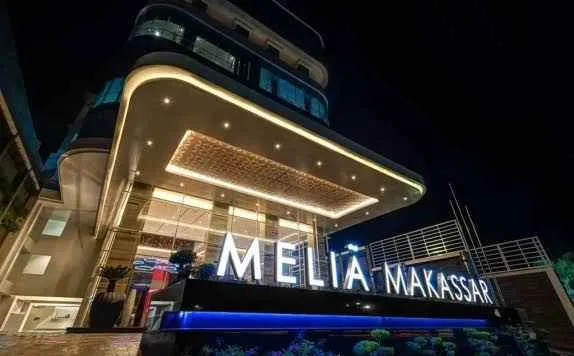

# **klasifikasi Tamu Hotel**

#**Import Library**

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**Import / Masukkan Dataset**

In [37]:
data = pd.read_csv("/content/hotel_guests_dataset.csv")

#**Pembersihan Data**

In [39]:
address_split = data['billing_address'].str.split('\n', expand=True)
data['address_number'] = address_split[0].str.extract(r'(\d+)')
data['street_locality'] = address_split[0].str.replace(r'^\d+\s', '', regex=True)
data[['city', 'state_zip']] = address_split[1].str.split(',', expand=True)
data[['state', 'zip_code']] = data['state_zip'].str.strip().str.split(' ', n=1, expand=True)
data = data.drop(['billing_address', 'state_zip'], axis=1)

In [40]:
data.head()

,Unnamed: 0,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,credit_card_number,address_number,street_locality,city,state,zip_code
0,0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,23 Apr 2020,146.834507,5161033759518983,90469,Karla Knolls Apt. 781,Susanberg,NC,28401
1,1,steven59@example.org,False,BASIC,NaN,27 Jun 2020,16 Aug 2020,185.497813,4133047413145475690,1080,Ashley Creek Apt. 622,West Amy,NM,25058
2,2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,07 Apr 2020,151.115528,4977328103788,99923,Anderson Trace Suite 861,North Haley,TX,76565
3,3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,08 Jun 2020,182.468031,3524946844839485,9301,John Parkways,Thomasland,OH,61350
4,4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,27 Oct 2019,195.497743,4446905799576890978,126,George Tunnel,Duranstad,MS,95176


In [42]:
data.drop(['Unnamed: 0','guest_email','checkin_date','checkout_date','address_number','zip_code'], inplace=True, axis=1)

In [43]:
data.isna().sum()

,0
has_rewards,0
room_type,0
amenities_fee,184
room_rate,0
credit_card_number,0
street_locality,0
city,0
state,228


In [44]:
data.dropna(inplace=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1617 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   has_rewards         1617 non-null   bool   
 1   room_type           1617 non-null   object 
 2   amenities_fee       1617 non-null   float64
 3   room_rate           1617 non-null   float64
 4   credit_card_number  1617 non-null   int64  
 5   street_locality     1617 non-null   object 
 6   city                1617 non-null   object 
 7   state               1617 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 102.6+ KB


In [50]:
data.isna().sum()

,0
has_rewards,0
room_type,0
amenities_fee,0
room_rate,0
credit_card_number,0
street_locality,0
city,0
state,0


In [46]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['room_type']= label_encoder.fit_transform(data['room_type'])

data["has_rewards"] = data.has_rewards.astype(int)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1617 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   has_rewards         1617 non-null   int64  
 1   room_type           1617 non-null   int64  
 2   amenities_fee       1617 non-null   float64
 3   room_rate           1617 non-null   float64
 4   credit_card_number  1617 non-null   int64  
 5   street_locality     1617 non-null   object 
 6   city                1617 non-null   object 
 7   state               1617 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 113.7+ KB


#**Analisis Data Eksplorasi**

<ipython-input-48-aca7513fc2bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data['room_type'], y=data['room_rate'], palette='inferno');


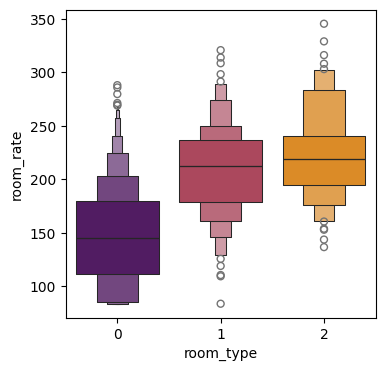

In [48]:
plt.figure(figsize=(4,4))
sns.boxenplot(x=data['room_type'], y=data['room_rate'], palette='inferno');

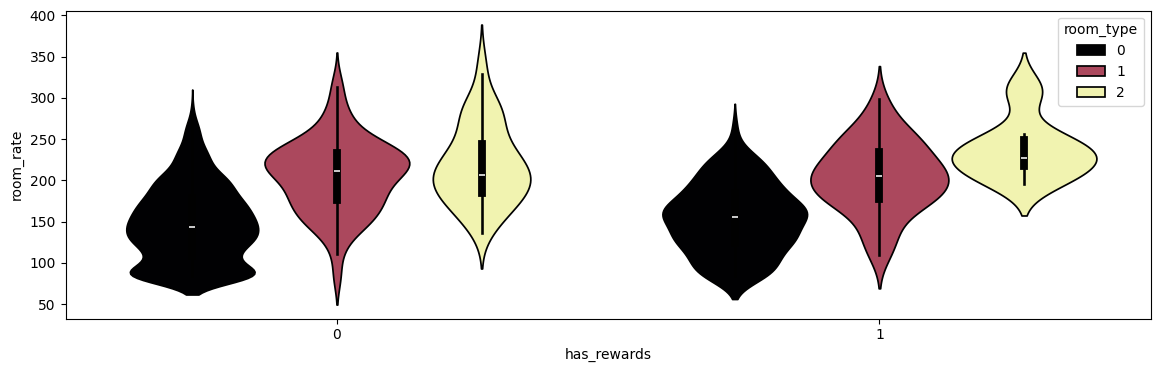

In [18]:
plt.figure(figsize=(14,4))
sns.violinplot(data=data,y="room_rate", x="has_rewards", palette='inferno',hue="room_type");

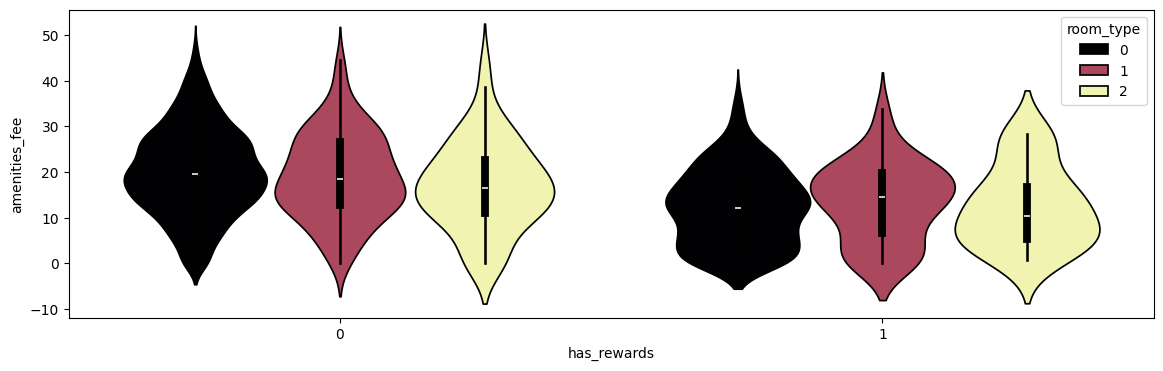

In [19]:
plt.figure(figsize=(14,4))
sns.violinplot(data=data,y="amenities_fee", x="has_rewards", palette='inferno',hue="room_type");

#**Latih / Melatih Model**

In [22]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [23]:
target_col='room_type'
features = [i for i in data.columns]
features.remove('room_type')
X=data[features]
y=data[target_col]

In [24]:
X_train,X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [25]:
rfmodel=RandomForestClassifier()
rfmodel.fit(X_train, Y_train)
rfpred = rfmodel.predict(X_test)

In [26]:
xgmodel=XGBClassifier()
xgmodel.fit(X_train, Y_train)
xgpred = xgmodel.predict(X_test)

In [27]:
gbmodel=GradientBoostingClassifier()
gbmodel.fit(X_train, Y_train)
gbpred = gbmodel.predict(X_test)

#Mencuba / Mengetes Model **

In [28]:
print("Accuracy of RandomForestClassifier : ",accuracy_score(Y_test, rfpred))
print("Accuracy of XGBClassifier : ",accuracy_score(Y_test, xgpred))
print("Accuracy of GradientBoostingClassifier : ",accuracy_score(Y_test, gbpred))

Accuracy of RandomForestClassifier :  0.8642201834862385
Accuracy of XGBClassifier :  0.8623853211009175
Accuracy of GradientBoostingClassifier :  0.8495412844036697
